In [146]:
import scipy.integrate as integrate
import scipy.special as ss
import numpy as np
import matplotlib.pyplot as plt

## First simple example

Let us consider function

$$f(x)=\cos(x)+x\qquad x\in[0,2\pi]$$

an integral is equal

$$F(x):=\int_{0}^{x} f(z) dz = \sin(x)+\frac12x^2$$

In [11]:
# numerical implementation
f  = lambda x: np.cos(x)+x
F  = lambda x: np.sin(x)+x**2/2
fi = lambda x: integrate.quad(f,0,x)[0]
fi = np.vectorize(fi)

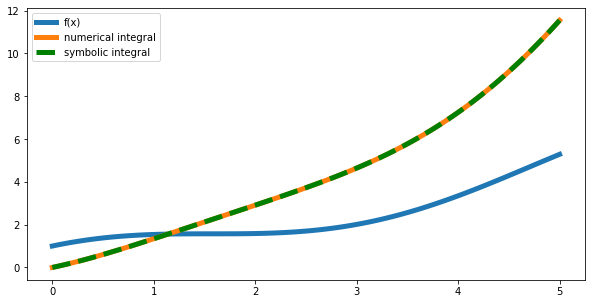

In [50]:
fig = plt.figure(figsize=(10,5))
x=np.linspace(0,5,101)
plt.plot(x,f(x), label = 'f(x)', linewidth=5);
plt.plot(x,fi(x), label = "numerical integral", linewidth=5);
plt.plot(x,F(x), 'g--', label='symbolic integral', linewidth=5);
plt.legend();

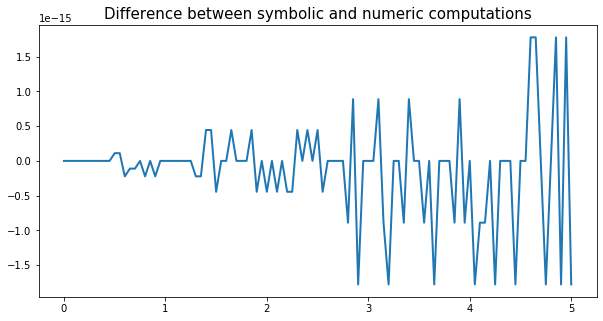

In [48]:
fig = plt.figure(figsize=(10,5))
x=np.linspace(0,5,101)
plt.plot(x,fi(x)-F(x),  linewidth=2);
plt.title("Difference between symbolic and numeric computations", fontsize=15);

## Parametric integrals

If function we want to integrate has free parameters we cn use use _arg_ argument

$$f(x,a) =  |\sin(a x)|$$

In [124]:
f = lambda x, a: np.abs(np.sin(a*x))
fi = lambda x, a: integrate.quad(f,0,x, args=a)[0]
fia = np.vectorize(lambda a: fi(2*np.pi,a))

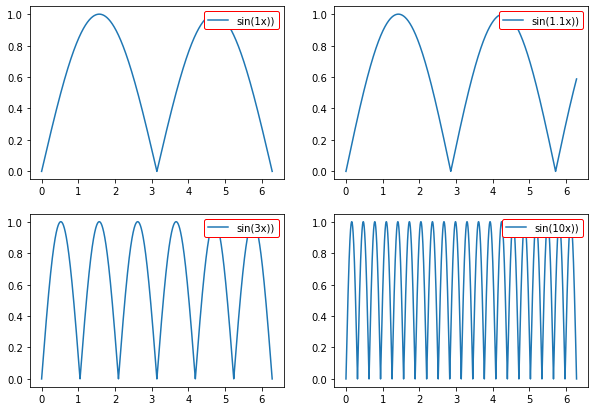

In [154]:
fig,ax = plt.subplots(2,2,figsize=(10,7))
x=np.linspace(0, 2*np.pi, 10001)
for i,k in enumerate([1,1.1,3,10]):
    plt.subplot(2,2,i+1)
    plt.plot(x, f(x,k), label = r'sin({}x))'.format(k))
    plt.legend(loc=1,framealpha=1, edgecolor='r')

<ipython-input-124-3db5981f3e4a>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fi = lambda x, a: integrate.quad(f,0,x, args=a)[0]


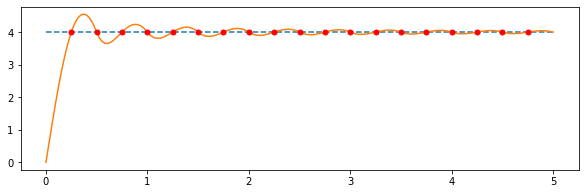

In [151]:
fig = plt.figure(figsize=(10,3))
a=np.linspace(0,5,201)
plt.plot([0,5],[4,4], '--')
plt.plot(a,fia(a))
roots = np.arange(1,20)/4
for x in roots:
    plt.plot(x,4, 'ro', markersize=5)

## Infinite integrals

In [160]:
f = lambda x,n: np.exp(-x)*x**n/np.math.factorial(n)

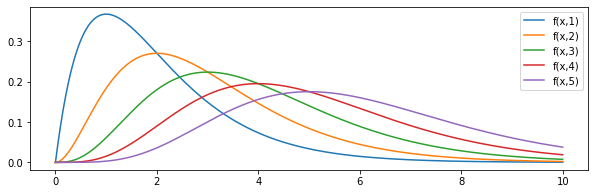

In [176]:
fig = plt.figure(figsize = (10,3))
x=np.linspace(0,10,1001)
for i in range(1,6):
    plt.plot(x, f(x,i), label = 'f(x,{})'.format(i));
plt.legend();

In [204]:
I = lambda n: integrate.quad(f,0,np.inf, args=n)[0]

<ipython-input-160-5905a7009141>:1: RuntimeWarning: overflow encountered in power
  f = lambda x,n: np.exp(-x)*x**n/np.math.factorial(n)
<ipython-input-160-5905a7009141>:1: RuntimeWarning: invalid value encountered in double_scalars
  f = lambda x,n: np.exp(-x)*x**n/np.math.factorial(n)
<ipython-input-204-09eecbe926db>:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = lambda n: integrate.quad(f,0,np.inf, args=n)[0]


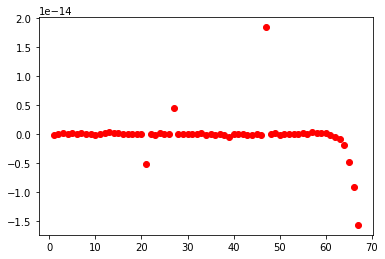

In [210]:
n = np.arange(1,101)
In = [I(i)-1 for i in n]
plt.plot(n ,In,'ro')

## Multiple integration

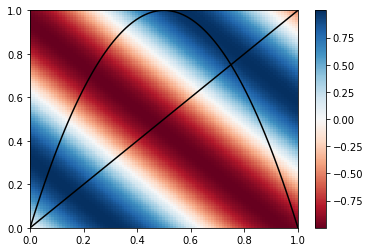

In [261]:
Z = lambda y,x: np.sin(5*x+5*y)
X, Y = np.meshgrid(np.linspace(0,1, 100), np.linspace(0, 1, 100))
z = Z(X,Y)

x = np.linspace(0,1,101)
f = lambda x: 4*x*(1-x)
g = lambda x: x
plt.pcolormesh(X,Y, z, cmap='RdBu');
plt.plot(x, f(x),'k');
plt.plot(x, g(x),'k');
plt.colorbar();

In [255]:
# Double integral
integrate.dblquad(lambda y, x: np.sin(5*x+5*y), 0, 3/4, lambda x: x, lambda x: 4*x*(1-x))

(-0.013527470575613149, 2.973045172569583e-14)

In [252]:
# Area 
integrate.dblquad(lambda x,y: 1,0,3/4,lambda x: x, lambda x: 4*x*(1-x))

(0.28125, 6.2450045135165055e-15)